# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

# Data Exploration

In [2]:
df = pd.read_excel("/Users/bbaifernbf/Documents/hands on DS project/data/online_retail_II.xlsx", sheet_name=0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
df["Invoice"].str.replace("[0-9]","", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]$") == False)]["StockCode"].unique()

array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [13]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


# Data Cleaning

In [14]:
cleaned_df = df.copy()

In [15]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
 
mask = (
  cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
cleaned_df["StockCode"] = cleaned_df["Invoice"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleanned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,489434,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,489434,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,538171,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,538171,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [17]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [18]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.00,407695,407695.00,407695.00
mean,13.59,2010-07-01 10:10:10.782177792,3.29,15368.50
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,13997.00
50%,5.00,2010-07-09 15:46:00,1.95,15321.00
75%,12.00,2010-10-14 17:09:00,3.75,16812.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.84,NaN,34.76,1679.80


In [19]:
len(cleaned_df[cleaned_df["Price"] == 0])

31

In [20]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [21]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407664.00,407664,407664.00,407664.00
mean,13.59,2010-07-01 10:15:11.871688192,3.29,15368.59
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,13997.00
50%,5.00,2010-07-09 15:47:00,1.95,15321.00
75%,12.00,2010-10-14 17:09:00,3.75,16812.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.84,NaN,34.76,1679.76


In [22]:
cleaned_df["Price"].min()

0.001

In [23]:
len(cleaned_df)/len(df)

0.7758216118798541

# Feature Engineering

Dropped about 23% of records

In [24]:
cleaned_df["SalesLinTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df

/var/folders/l5/9d2l0bz552z1815jf3d2q0c40000gn/T/ipykernel_80906/3306357194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLinTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLinTotal
0,489434,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,489434,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,489434,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,538171,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,538171,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [25]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLinTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,372.86,11,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,222.16,1,2010-09-27 14:59:00
3,12349.00,2671.14,3,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [26]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,372.86,11,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,222.16,1,2010-09-27 14:59:00,73
3,12349.00,2671.14,3,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


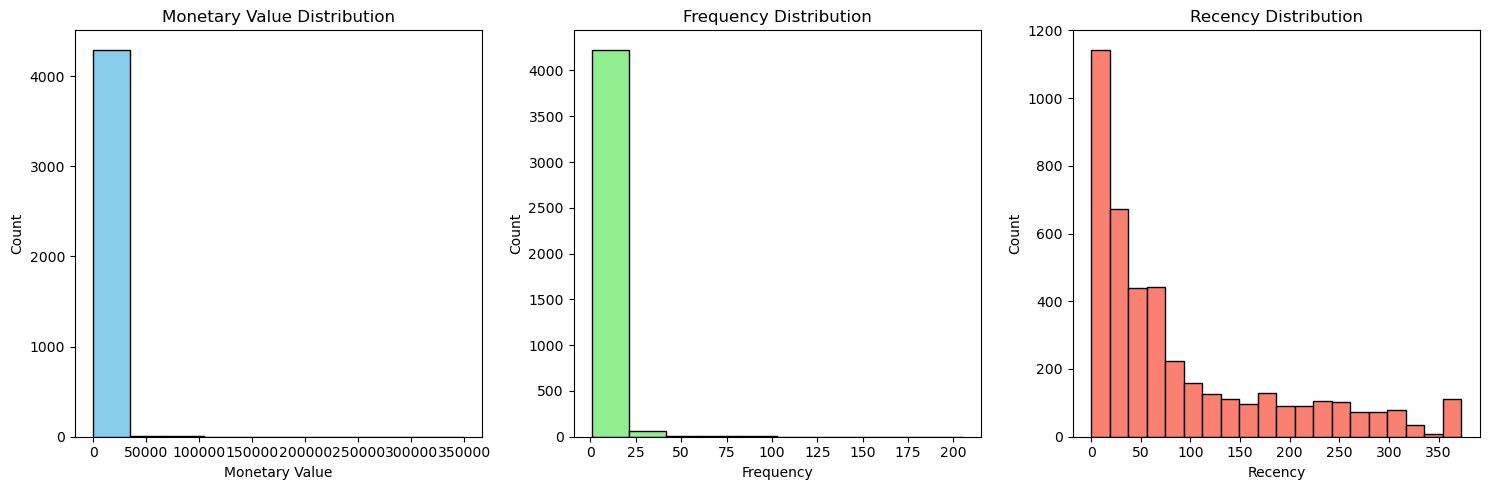

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel("Monetary Value")
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

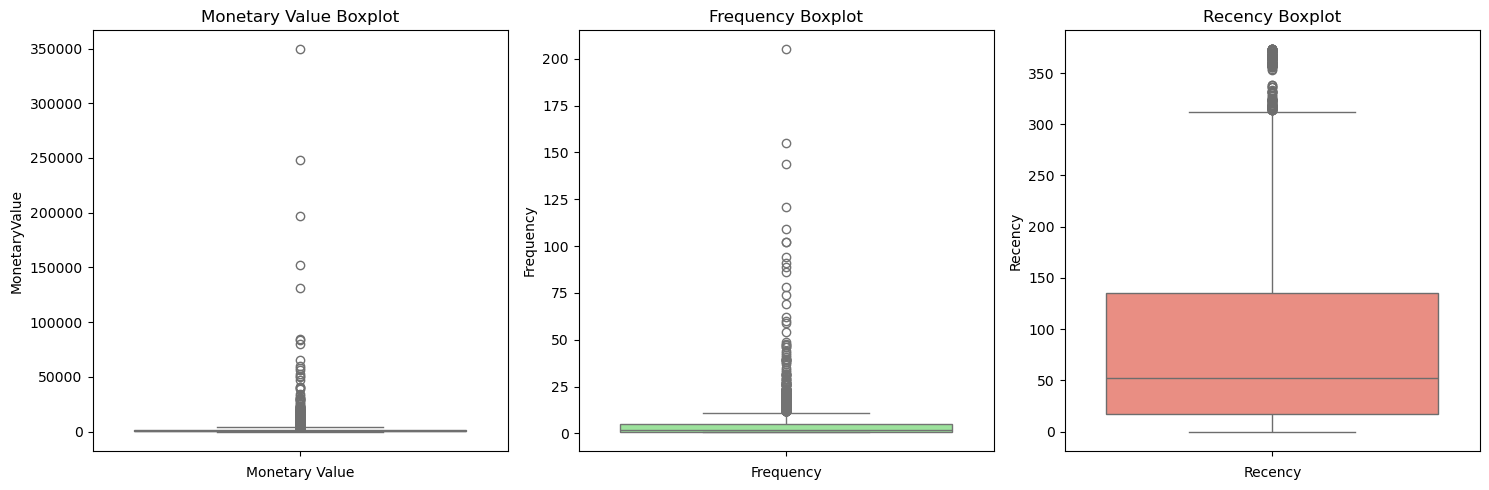

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data = aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data= aggregated_df['Frequency'], color='lightgreen')
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data = aggregated_df['Recency'], color='salmon')
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

In [29]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outlier_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
monetary_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,428.00,428.00,428.00,428,428.00
mean,15060.06,12319.51,17.28,2010-11-09 16:05:02.943925248,29.88
min,12357.00,3851.01,1.00,2010-01-17 11:33:00,0.00
25%,13573.00,4610.06,8.00,2010-11-08 10:35:30,3.00
50%,14927.00,6262.58,12.00,2010-11-26 11:15:30,13.00
75%,16653.00,10409.57,18.00,2010-12-06 09:54:45,31.00
max,18260.00,349164.35,205.00,2010-12-09 19:32:00,326.00
std,1729.85,26044.46,20.49,NaN,49.23


In [30]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outlier_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()
frequency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,285.00,285.00,285.00,285,285.00
mean,15307.80,14374.58,23.91,2010-11-23 13:55:24.631578880,15.97
min,12422.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13715.00,4331.41,13.00,2010-11-19 15:51:00,2.00
50%,15311.00,6507.67,17.00,2010-12-02 08:52:00,7.00
75%,16814.00,11645.70,23.00,2010-12-07 10:08:00,20.00
max,18260.00,349164.35,205.00,2010-12-09 19:32:00,211.00
std,1773.26,31518.80,22.83,NaN,25.78


In [31]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(monetary_outlier_df.index)) & (~aggregated_df.index.isin(frequency_outlier_df.index))]

non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3828.00,3828.00,3828.00,3828,3828.00
mean,15372.74,889.86,2.86,2010-09-02 15:28:27.931034368,97.91
min,12346.00,2.95,1.00,2009-12-01 09:55:00,0.00
25%,13910.50,281.21,1.00,2010-07-07 12:00:45,22.00
50%,15380.50,589.13,2.00,2010-10-12 12:44:30,58.00
75%,16846.25,1273.61,4.00,2010-11-17 13:09:30,155.00
max,18287.00,3817.18,11.00,2010-12-09 20:01:00,373.00
std,1693.30,824.81,2.24,NaN,98.74


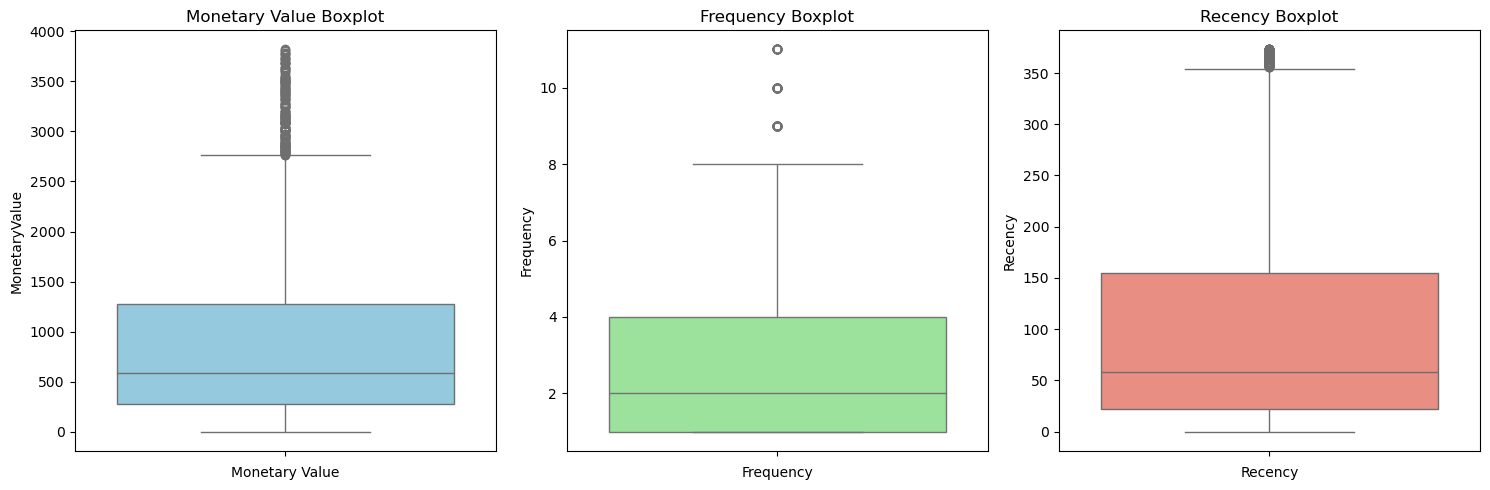

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data = non_outlier_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data= non_outlier_df['Frequency'], color='lightgreen')
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data = non_outlier_df['Recency'], color='salmon')
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

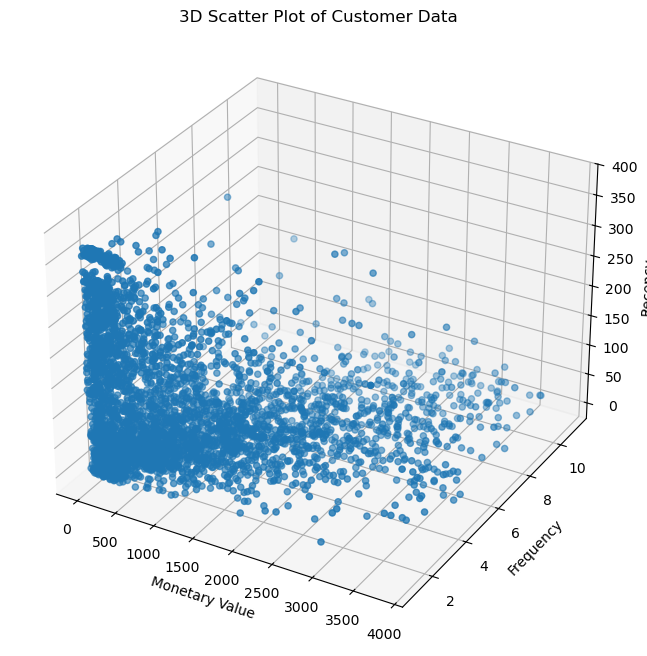

In [33]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outlier_df["MonetaryValue"], non_outlier_df["Frequency"], non_outlier_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

Standard Scaler

In [34]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outlier_df[['MonetaryValue', 'Frequency', "Recency"]])

scaled_data

array([[-0.62689958,  3.62975807,  0.66943051],
       [ 0.52559219, -0.38566835, -0.9714245 ],
       [-0.80963268, -0.83182684, -0.25228434],
       ...,
       [-0.56125147, -0.83182684,  1.99629474],
       [ 0.49298639, -0.38566835,  0.13260757],
       [ 1.76530355,  0.50664863, -0.81949348]])

In [35]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outlier_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.63,3.63,0.67
1,0.53,-0.39,-0.97
2,-0.81,-0.83,-0.25
3,2.16,0.06,-0.57
4,-0.71,-0.83,-0.89
...,...,...,...
4307,-0.30,1.40,-0.82
4308,-0.52,-0.83,-0.32
4309,-0.56,-0.83,2.00
4310,0.49,-0.39,0.13


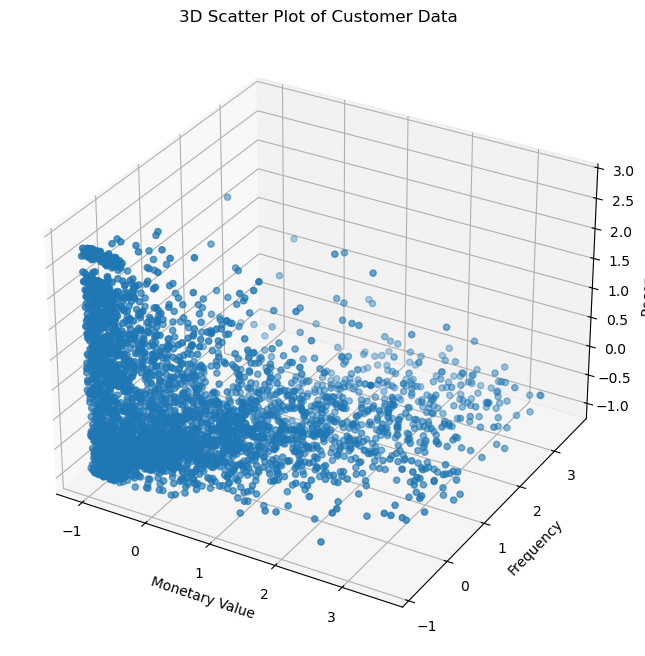

In [36]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

# KMeans Clustering

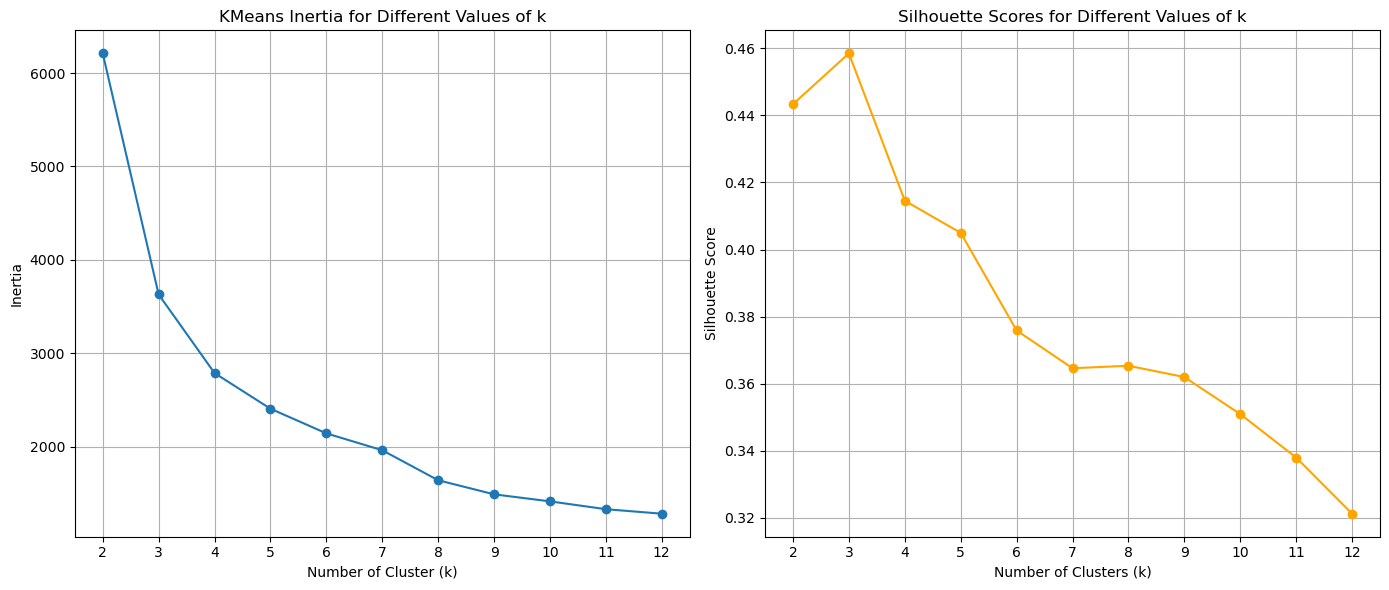

In [37]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_lebels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_lebels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Cluster (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_lebels = kmeans.fit_predict(scaled_data_df)

cluster_lebels

array([3, 2, 1, ..., 0, 2, 2], dtype=int32)

In [39]:
non_outlier_df["Cluster"] = cluster_lebels

non_outlier_df

/var/folders/l5/9d2l0bz552z1815jf3d2q0c40000gn/T/ipykernel_80906/820306033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df["Cluster"] = cluster_lebels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,372.86,11,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.00,222.16,1,2010-09-27 14:59:00,73,1
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4307,18283.00,641.77,6,2010-11-22 15:30:00,17,2
4308,18284.00,461.68,1,2010-10-04 11:33:00,66,1
4309,18285.00,427.00,1,2010-02-17 10:24:00,295,0
4310,18286.00,1296.43,2,2010-08-20 11:57:00,111,2


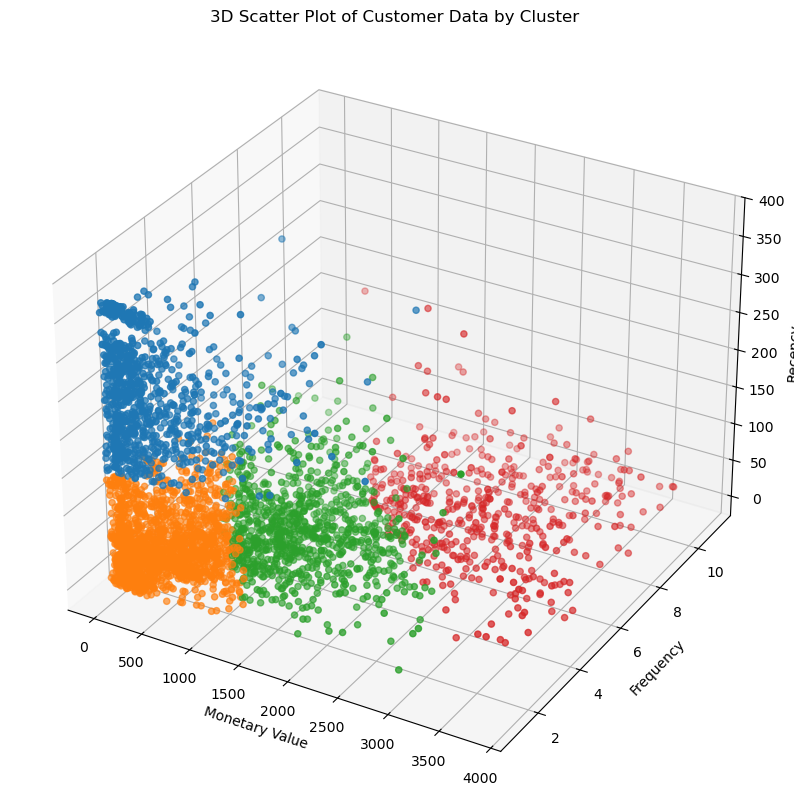

In [ ]:
cluster_colors = {0: '#1f77b4', # Blue
                  1: '#ff7f0e', # Orange
                  2: '#2ca02c', # Green
                  3: '#d62728'} # Red

colors = non_outlier_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outlier_df['MonetaryValue'],
                     non_outlier_df['Frequency'],
                     non_outlier_df['Recency'],
                     c=colors, # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

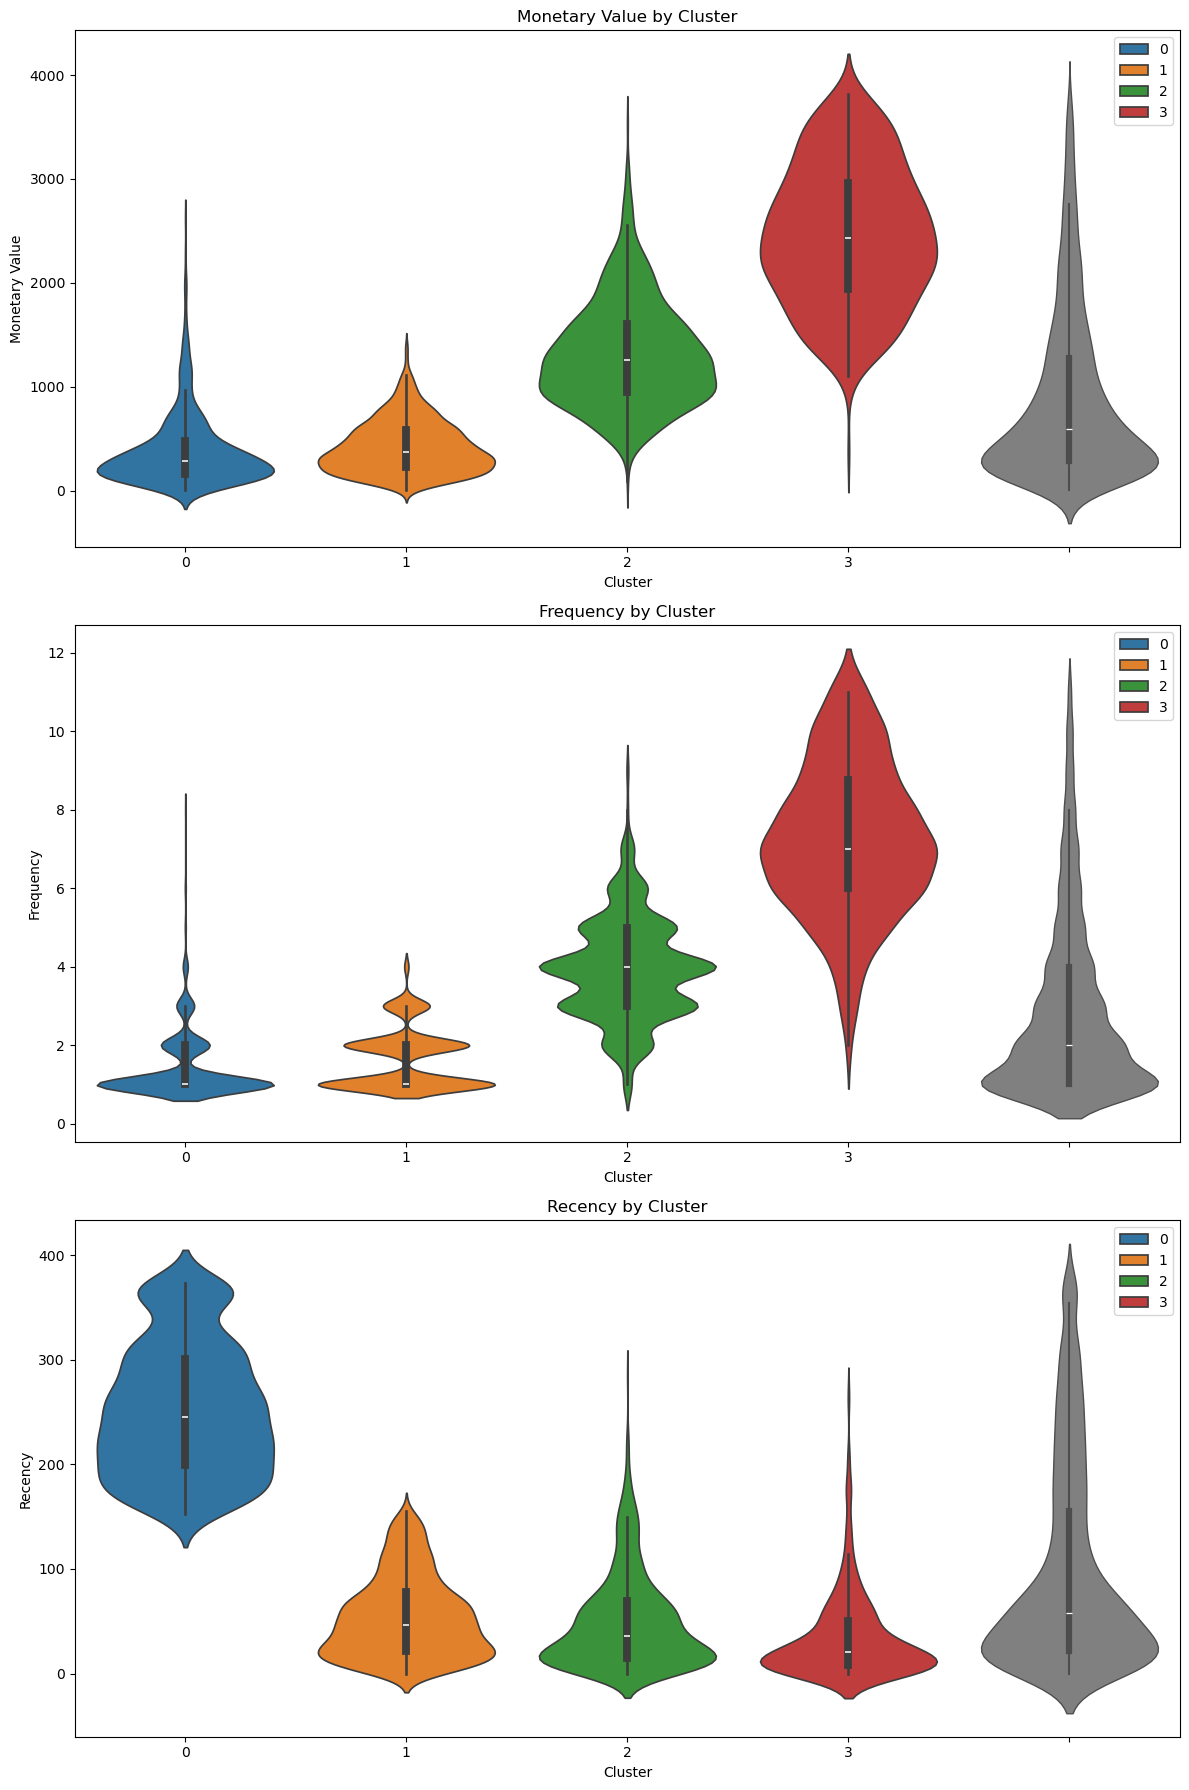

In [42]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['MonetaryValue'], palette=cluster_colors, hue=non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['MonetaryValue'],color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Frequency'], palette=cluster_colors, hue=non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['Frequency'],color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outlier_df['Cluster'], y=non_outlier_df['Recency'], palette=cluster_colors, hue=non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['Recency'],color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Re-Engage"

- Rationale: This group includes lower_value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- Action: Use taargeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

2. Cluster 1 (Orange): "Nurture"
- Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchased. These customers may be new or need nurturing to increase their engagemet and spending.
- Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

3. Cluster 2 (Green): "Retain"
- Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

4. Cluster 3 (Red): "Reward"
- Rationale: this cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their negagement.
- Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.


**Summary of Clusters Names**

- Cluster 0 (Blue): "Re-Engage"
- Cluster 1 (Orange): "Nurture"
- Cluster 2 (Green): "Retain"
- Cluster 3 (Red) : "Reward"

In [45]:
overlap_indices = monetary_outlier_df.index.intersection(frequency_outlier_df.index)

monetary_only_outliers = monetary_outlier_df.drop(overlap_indices)
frequency_only_outliers = frequency_outlier_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outlier_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_cluster_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,12079.99,2,2010-11-16 14:29:00,23,-1
26,12380.00,6951.49,7,2010-08-31 14:54:00,100,-1
44,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
50,12415.00,19543.84,7,2010-11-29 15:07:00,10,-1
64,12433.00,7205.39,5,2010-12-08 16:49:00,1,-1
...,...,...,...,...,...,...
4262,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4263,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4264,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4268,18231.00,4797.70,23,2010-10-29 14:17:00,41,-3


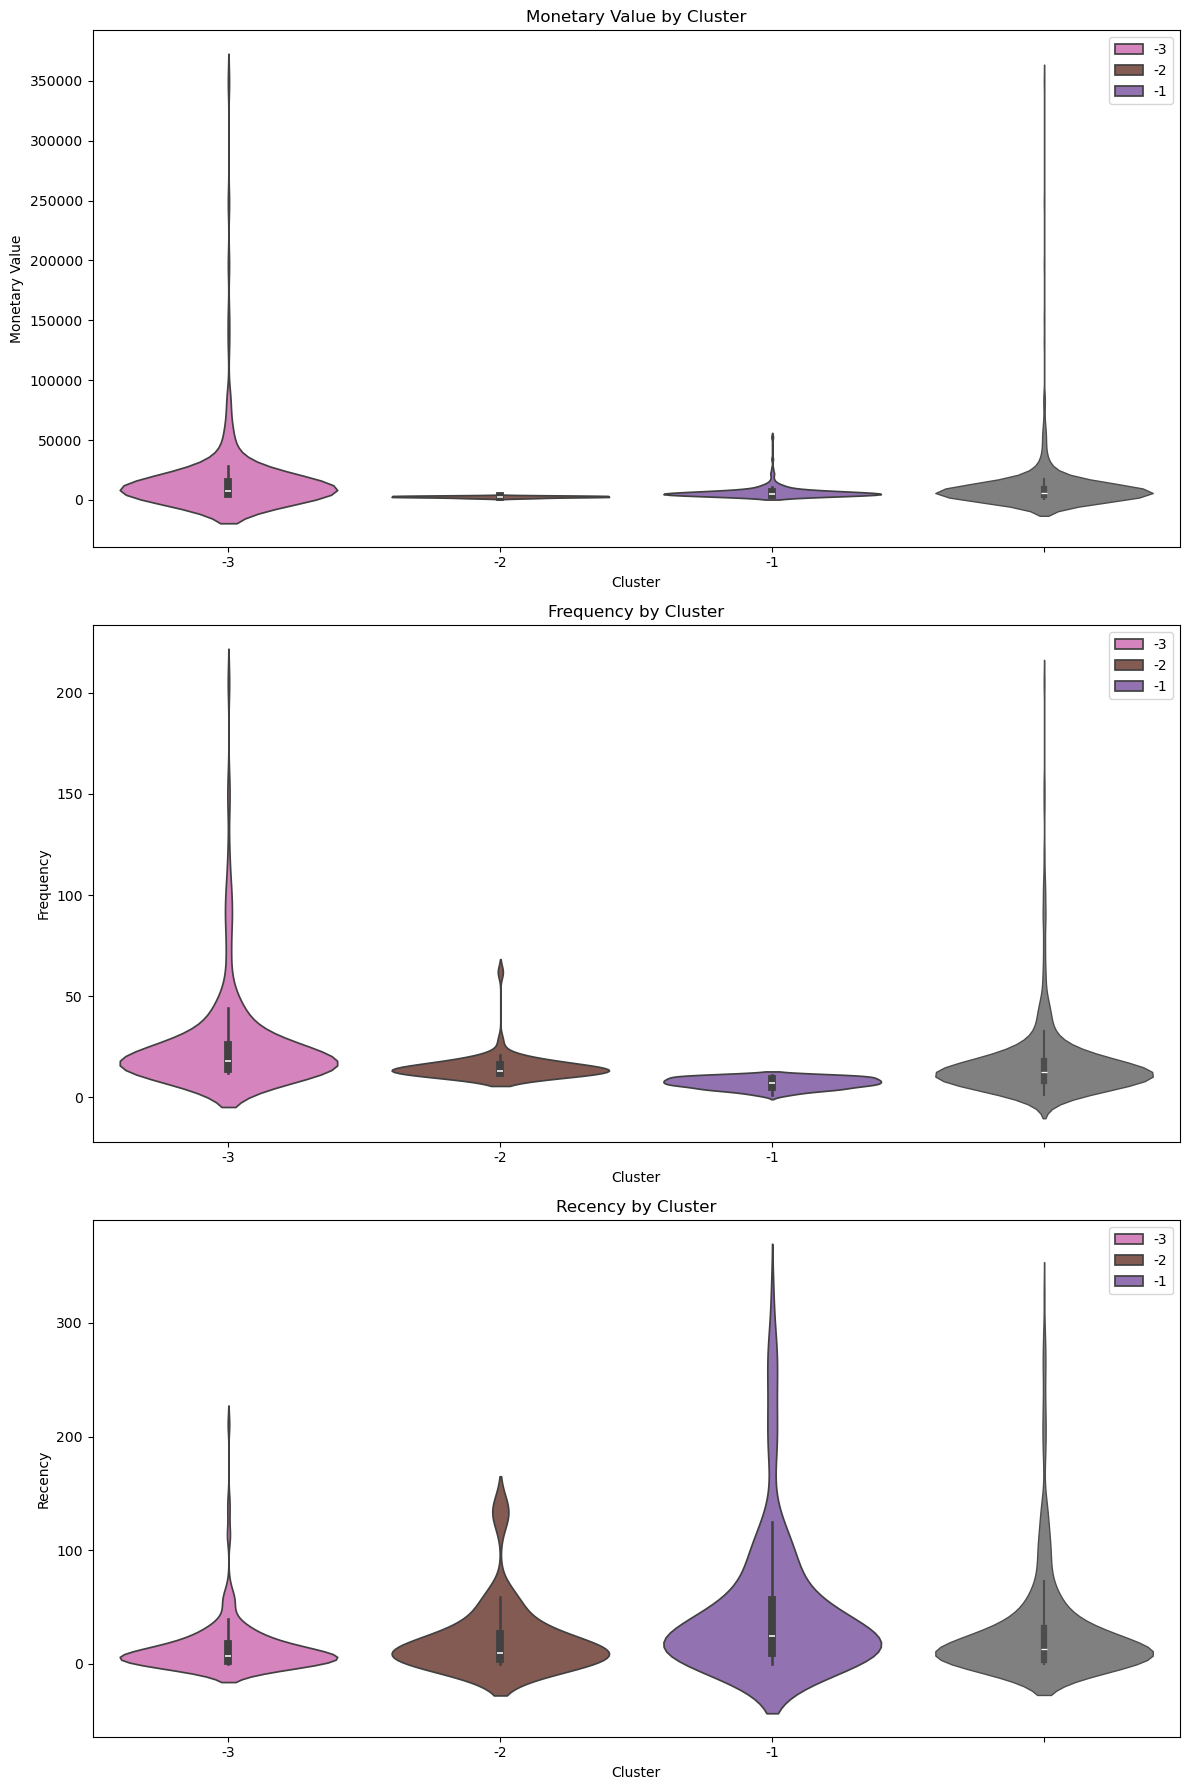

In [46]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_cluster_df['Cluster'], y=outlier_cluster_df['MonetaryValue'], palette=cluster_colors, hue=outlier_cluster_df['Cluster'])
sns.violinplot(y=outlier_cluster_df['MonetaryValue'],color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_cluster_df['Cluster'], y=outlier_cluster_df['Frequency'], palette=cluster_colors, hue=outlier_cluster_df['Cluster'])
sns.violinplot(y=outlier_cluster_df['Frequency'],color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_cluster_df['Cluster'], y=outlier_cluster_df['Recency'], palette=cluster_colors, hue=outlier_cluster_df['Cluster'])
sns.violinplot(y=outlier_cluster_df['Recency'],color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster -1 (Monetary Outliers) PAMPER
- Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. 
- Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

2. Cluster -2 (Frequency Outliers) UPSELL
- Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling oppotunities. 
- Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

3. Cluster -3 (Monetary & Frequency Outliers) DELIGHT
- Characteristics: The most valuable outlier, with extreme spending and frequent purchases. They are likely your top-tier customers  who require special attention.
- Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [49]:
cluster_lebels = {
    0: "RE-ENGAGE",
    1: "NURTURE",
    2: "RETAIN",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [48]:
full_clustering_df = pd.concat([non_outlier_df, outlier_cluster_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,372.86,11,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.00,222.16,1,2010-09-27 14:59:00,73,1
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4262,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4263,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4264,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4268,18231.00,4797.70,23,2010-10-29 14:17:00,41,-3


In [50]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_lebels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,372.86,11,2010-06-28 13:53:00,164,3,REWARD
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,2,RETAIN
2,12348.00,222.16,1,2010-09-27 14:59:00,73,1,NURTURE
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,2,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1,NURTURE
...,...,...,...,...,...,...,...
4262,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4263,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4264,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4268,18231.00,4797.70,23,2010-10-29 14:17:00,41,-3,DELIGHT


# Visualisation

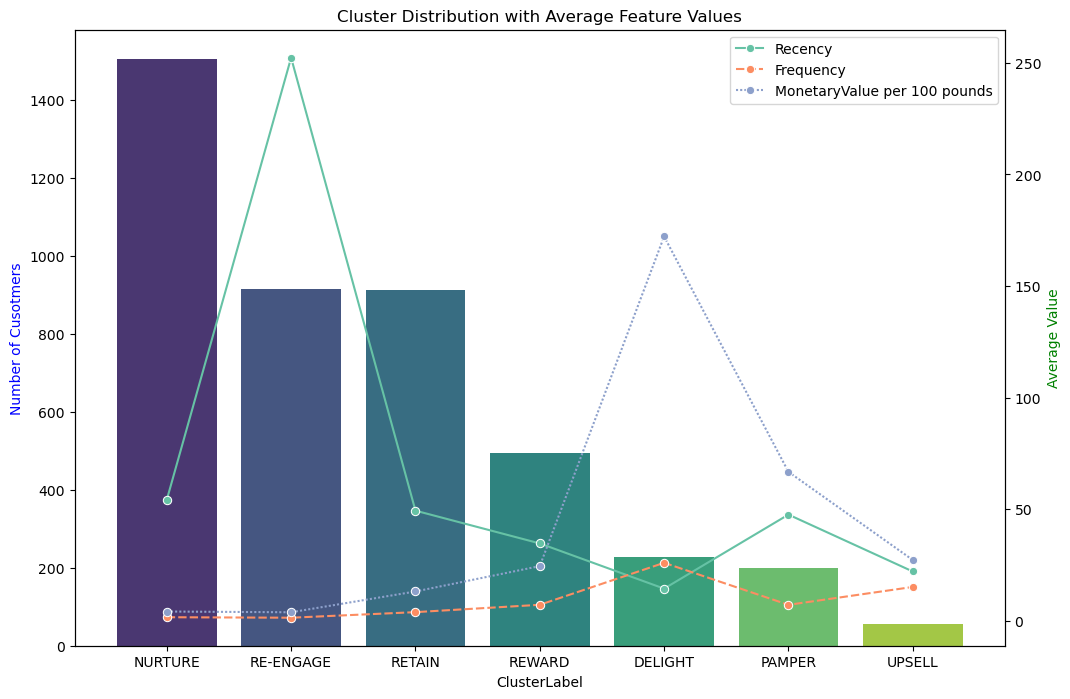

In [55]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['MonetaryValue'] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency','Frequency','MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Cusotmers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker = 'o')
ax2.set_ylabel('Average Value', color='g')

plt.show()